# Importing LIbraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import re 

# Importing Data

In [2]:
data=pd.read_csv("fr.openfoodfacts.org.products.csv",sep='\t')

/home/taher/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#length of data
n=len(data)
print(n)

320772


In [4]:
# Statics of data 
data.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.000000,248939.000000,0.0,248939.000000,0.0,0.0,2.611130e+05,857.000000,243891.000000,...,49.000000,3036.000000,165.000000,948.000000,0.0,268.000000,221210.000000,221210.000000,0.0,0.0
mean,NaN,1.936024,0.019659,NaN,0.055246,NaN,NaN,1.141915e+03,585.501214,12.730379,...,6.425698,31.458587,15.412121,49.547785,NaN,341.700764,9.165535,9.058049,NaN,NaN
std,NaN,2.502019,0.140524,NaN,0.269207,NaN,NaN,6.447154e+03,712.809943,17.578747,...,2.047841,31.967918,3.753028,18.757932,NaN,425.211439,9.055903,9.183589,NaN,NaN
min,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,NaN,0.000000,0.000000,NaN,0.000000,NaN,NaN,3.770000e+02,49.400000,0.000000,...,6.300000,0.000000,12.000000,32.000000,NaN,98.750000,1.000000,1.000000,NaN,NaN
50%,NaN,1.000000,0.000000,NaN,0.000000,NaN,NaN,1.100000e+03,300.000000,5.000000,...,7.200000,23.000000,15.000000,50.000000,NaN,195.750000,10.000000,9.000000,NaN,NaN
75%,NaN,3.000000,0.000000,NaN,0.000000,NaN,NaN,1.674000e+03,898.000000,20.000000,...,7.400000,51.000000,15.000000,64.250000,NaN,383.200000,16.000000,16.000000,NaN,NaN
max,NaN,31.000000,2.000000,NaN,6.000000,NaN,NaN,3.251373e+06,3830.000000,714.290000,...,8.400000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


In [5]:
#Columns's length
len(data.columns)

162

# Delete useless columns

We will drop each columns have more than 50% missing values.

In [6]:
def del_useless_columns(df,level):
    """ This function allow to delete columns, which have more than the accepted level of missing
        values.The accepted level is defined at first and introduced as argument.
         
         Args:
         
         df(DataFrame): the data,which the function will examinate.
         level(int): the level  of missing values that the function accept to save column.
         
         Returns:
         
         dt(DataFrame): DataFrame, which contain only columns that have less than 50% of missing 
         values.
         """
    
    l=len(df)
    for c in df.columns:
        if c !="product_name":
           test=((df[c].count())/l)*100
           if test < level:
              del (df[c])
    return df
    
    

In [7]:
data=del_useless_columns(data,50)

In [8]:
data.describe()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,248939.000000,248939.000000,248939.000000,2.611130e+05,243891.000000,229554.000000,243588.000000,244971.000000,200886.000000,259922.000000,255510.000000,255463.000000,221210.000000,221210.000000
mean,1.936024,0.019659,0.055246,1.141915e+03,12.730379,5.129932,32.073981,16.003484,2.862111,7.075940,2.028624,0.798815,9.165535,9.058049
std,2.502019,0.140524,0.269207,6.447154e+03,17.578747,8.014238,29.731719,22.327284,12.867578,8.409054,128.269454,50.504428,9.055903,9.183589
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-17.860000,-6.700000,-800.000000,0.000000,0.000000,-15.000000,-15.000000
25%,0.000000,0.000000,0.000000,3.770000e+02,0.000000,0.000000,6.000000,1.300000,0.000000,0.700000,0.063500,0.025000,1.000000,1.000000
50%,1.000000,0.000000,0.000000,1.100000e+03,5.000000,1.790000,20.600000,5.710000,1.500000,4.760000,0.581660,0.229000,10.000000,9.000000
75%,3.000000,0.000000,0.000000,1.674000e+03,20.000000,7.140000,58.330000,24.000000,3.600000,10.000000,1.374140,0.541000,16.000000,16.000000
max,31.000000,2.000000,6.000000,3.251373e+06,714.290000,550.000000,2916.670000,3520.000000,5380.000000,430.000000,64312.800000,25320.000000,40.000000,40.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 34 columns):
code                                       320749 non-null object
url                                        320749 non-null object
creator                                    320770 non-null object
created_t                                  320769 non-null object
created_datetime                           320763 non-null object
last_modified_t                            320772 non-null object
last_modified_datetime                     320772 non-null object
product_name                               303010 non-null object
brands                                     292360 non-null object
brands_tags                                292352 non-null object
countries                                  320492 non-null object
countries_tags                             320492 non-null object
countries_fr                               320492 non-null object
ingredients_text               

# Delete Useless Rows:

In [10]:
#We will drop all rows which have missing product_name'value.

data=data[data.product_name.notnull()]

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303010 entries, 0 to 320771
Data columns (total 34 columns):
code                                       302987 non-null object
url                                        302987 non-null object
creator                                    303009 non-null object
created_t                                  303007 non-null object
created_datetime                           303001 non-null object
last_modified_t                            303010 non-null object
last_modified_datetime                     303010 non-null object
product_name                               303010 non-null object
brands                                     289936 non-null object
brands_tags                                289928 non-null object
countries                                  302782 non-null object
countries_tags                             302782 non-null object
countries_fr                               302782 non-null object
ingredients_text               

In [12]:
#The data is large enough .So eliminate all rows, which contains missing values is more better 
#than replace them by estimated value.
data=data.dropna(axis=0,how='any')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154219 entries, 2 to 320768
Data columns (total 34 columns):
code                                       154219 non-null object
url                                        154219 non-null object
creator                                    154219 non-null object
created_t                                  154219 non-null object
created_datetime                           154219 non-null object
last_modified_t                            154219 non-null object
last_modified_datetime                     154219 non-null object
product_name                               154219 non-null object
brands                                     154219 non-null object
brands_tags                                154219 non-null object
countries                                  154219 non-null object
countries_tags                             154219 non-null object
countries_fr                               154219 non-null object
ingredients_text               

# Outliers

In [14]:
df=data.describe()
print(df)

         additives_n  ingredients_from_palm_oil_n  \
count  154219.000000                154219.000000   
mean        2.007593                     0.013604   
std         2.529205                     0.117728   
min         0.000000                     0.000000   
25%         0.000000                     0.000000   
50%         1.000000                     0.000000   
75%         3.000000                     0.000000   
max        31.000000                     2.000000   

       ingredients_that_may_be_from_palm_oil_n   energy_100g       fat_100g  \
count                            154219.000000  1.542190e+05  154219.000000   
mean                                  0.045059  1.220149e+03      13.129011   
std                                   0.237950  8.310730e+03      15.508361   
min                                   0.000000  0.000000e+00       0.000000   
25%                                   0.000000  4.690000e+02       0.836500   
50%                                   0.000000  

The last table , show us obviously that there is values which are outliers.Specialy for the features of nutriment'quantity in 100 grs of product. In such features, we can not imagine that there is product which can contain quantity of nutriment bigger ten times or more than the average.Hereunder we will try to see theses outliers obviously by a graphic.

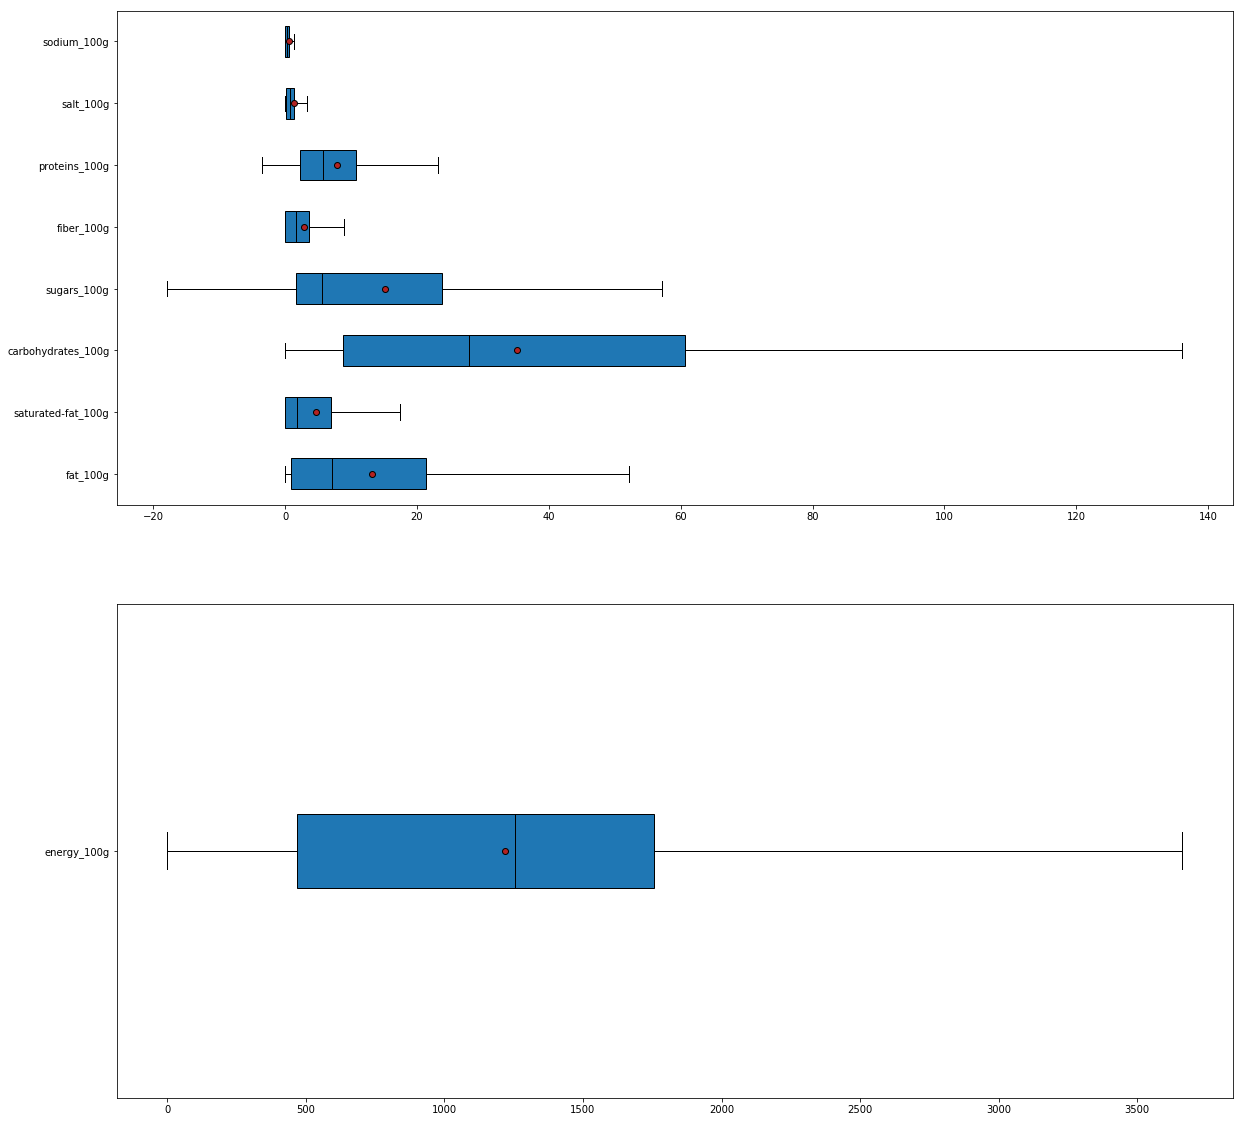

In [15]:
expresion=r'\w_100g$' # regular expresion define the column'name of nutriment'quantity in 100 grs of product.
col=[]
valeurs=[]
for c in data.columns:
    if re.search(expresion,c) is not None and c not in ("energy_100g","nutrition-score-fr_100g","nutrition-score-uk_100g"):
        col.append(c)
        valeurs.append(data[c])
fig=plt.figure(figsize=(20,20))
ax1=fig.add_subplot(211)
ax2=fig.add_subplot(212)
medianprops={'color':"black"} 
meanprops={'marker':'o','markeredgecolor':'black','markerfacecolor':'firebrick'}
ax1.boxplot(valeurs,labels=col,vert=False,medianprops=medianprops,meanprops=meanprops,showmeans=True,showfliers=False,patch_artist=True)
ax2.boxplot([data["energy_100g"]],labels=["energy_100g"],vert=False,medianprops=medianprops,meanprops=meanprops,showmeans=True,showfliers=False,patch_artist=True)
plt.show()       

We notice that there are some negatives values , specially in the variable of of sugars_100grs.So we consider theses 
values as outliers and we will delete them.

 The measurement that we will use to identify ouliers in columns of nutriment'quantity in 100 grs of product, is the Interquartile range . So we consider all values below Q1-1.5IQR or above Q3+1.5IQR as outliers. Thus, we drop all rows which contains ouliers values in theses columns because of we can not find a reliable estimation of theses values. In fact, we don't have any element which allow us to estimate how much each product can contain for each nutriment. 

Notice:  
Q1: is the middle value beteween the smallest number and the median of the dataset.  
Q2: is the median of the dataset.  
Q3: is the middle value between the median and the highest value.  
IQR=Q3-Q1

In [16]:
iqr=0
q1=0
q3=0
for c in data.columns:
    if re.search(expresion,c) is not None and c not in ("nutrition-score-fr_100g","nutrition-score-uk_100g"):
        iqr=1.5 * (df[c][6]-df[c][4])
        q1=df[c][4]
        q3=df[c][6]
        qt1=q3+iqr
        qt2=q1-iqr
        data=data[(data[c]< qt1) & (data[c]>qt2)]
        
        
        
       

In [18]:
data=data[data['sugars_100g']>=0]

In [19]:
data.describe()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,114348.000000,114348.000000,114348.000000,114348.000000,114348.000000,114348.000000,114348.000000,114348.000000,114348.000000,114348.000000,114348.000000,114348.000000,114348.000000,114348.000000
mean,2.164699,0.015855,0.053477,1014.706837,9.852145,3.190077,32.556176,12.480537,2.001966,6.188586,0.813685,0.320348,7.268592,7.180161
std,2.623329,0.127205,0.258349,696.972998,11.208988,4.210759,26.638340,14.651303,2.147178,5.385384,0.754613,0.297092,8.590167,8.622536
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.570000,0.000000,0.000000,-13.000000,-13.000000
25%,0.000000,0.000000,0.000000,351.000000,0.600000,0.000000,8.570000,1.770000,0.000000,2.000000,0.134620,0.053000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,962.000000,5.260000,1.200000,23.860000,5.310000,1.500000,5.000000,0.680720,0.268000,6.000000,5.000000
75%,3.000000,0.000000,0.000000,1598.000000,16.670000,5.260000,57.140000,20.000000,3.300000,9.000000,1.231900,0.485000,14.000000,14.000000
max,31.000000,2.000000,6.000000,3515.000000,52.220000,17.460000,100.000000,57.100000,8.930000,23.260000,3.281680,1.292000,36.000000,36.000000


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114348 entries, 2 to 320768
Data columns (total 34 columns):
code                                       114348 non-null object
url                                        114348 non-null object
creator                                    114348 non-null object
created_t                                  114348 non-null object
created_datetime                           114348 non-null object
last_modified_t                            114348 non-null object
last_modified_datetime                     114348 non-null object
product_name                               114348 non-null object
brands                                     114348 non-null object
brands_tags                                114348 non-null object
countries                                  114348 non-null object
countries_tags                             114348 non-null object
countries_fr                               114348 non-null object
ingredients_text               

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0fea77f6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0fea77f518>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7f0fea794080>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0feac8cc18>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0feac8c748>],
 'means': [<matplotlib.lines.Line2D at 0x7f0feac8c6d8>]}

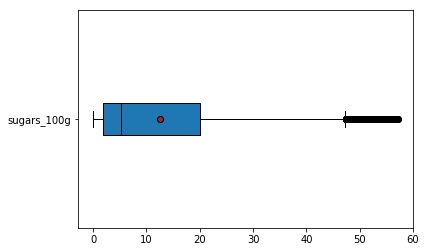

In [25]:
plt.boxplot(data['sugars_100g'],labels=['sugars_100g'],vert=False,medianprops=medianprops,meanprops=meanprops,showmeans=True,showfliers=True,patch_artist=True)

# Conclusion

Along this party, we had cleaned our dataset from not significant features , missing values and outliers. We had adopted an 
approach based in automating treatement, which allow that our work function even if there is slightly changes in database.

# Exporting Data

In [26]:
data.to_csv('cleanfile.csv')